# JRM Example

This notebook shows how to calculate the JRM features on the benchmark daataset from arXiv:2311.06686. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import multiprocessing as mp
import JRM_utils
from JRM_utils import JRM
import requests

In [2]:
print('Loading data...')
url = 'https://zenodo.org/records/10404290/files/dataset_PtNormed.h5?download=1'
r = requests.get(url, allow_redirects=True)
fname = './dataset_PtNormed.h5' 
with open(fname, 'wb') as f:
    f.write(r.content) 
print('Done!')

f = h5py.File(fname, 'r')
y = np.array(f['target'])
threeM = np.array(f['Constituents']['threeM'])
f.close()

print('Number of jets: ', len(y))
print('Number of classes: ', len(np.unique(y)))

Loading data...
Done!
Number of jets:  108359
Number of classes:  7


Calculating JRMs using C2 discrete rotational symmetry...

In [3]:
njobs = mp.cpu_count()
print("Number of cores: ", njobs)
kappa = 1
beta = 1

def JRM_C2(jet):
    return JRM(jet, 2, kappa=kappa, beta=beta, jet_radius=1.2, optimizer='grid')

with mp.Pool(njobs) as pool:
    results_C2 = pool.map(JRM_C2, threeM)
results_C2 = np.array(results_C2)

Number of cores:  8


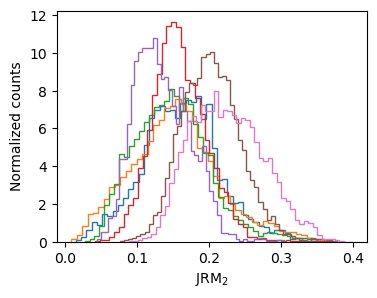

In [4]:
labels = ['N=1', 'N=2', 'N=3', 'N=4b', 'N=6', 'N=8', 'N=4q']
labels_ix = [0, 1, 2, 3, 6, 4, 5]

fig = plt.figure(figsize=(4, 3))
for ix in labels_ix:
    plt.hist(results_C2[y==ix], bins=50, label=labels[ix], histtype='step', density=True)
plt.xlabel(r'JRM$_2$')
plt.ylabel('Normalized counts')
plt.show()